In [1]:
# load and explore the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
df = pd.read_csv("Music_Info.csv")
df.head()
print(df.shape)

print(df.columns.tolist())


(50683, 21)
['track_id', 'name', 'artist', 'spotify_preview_url', 'spotify_id', 'tags', 'genre', 'year', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


In [3]:
# this step is data preprocessing. Asked ChatGPT to help me figure out what columns to drop. It emphasized the importance of 
# keeping columns with numerical audio features. It gave me an audio of columns to drop and that's how I decided the rows to keep.
# I asked it to make sure the code I had looked decent for this part and continued.

# I then asked ChatGPT to make sure I was correctly separating the features and target. It said I was doing good so I moved on.

# For the next parts to encode the target, which is genre, scale the features, and split the training/testing data, I referred to old homeworks
# I'd done and also referred to the syntax provided by ChatGPT. It helped me with the encoding part and basically what this means is it converted genre
# strings like rock and pop into integers which is important when you're dealing with classification.

# ChatGPT then provided me with helping on the splitting into training and testing parts. I had already attempted to do the feature scaling myself but I noticed a 
# small difference in what Chat offered me so when I asked for an explanantion I learned that my approach was scaling the entire dataset X before doing a train/test split.
# It explained that the safer approach would be to split first and then scale using only the training data because if you scale before splitting you can leak information 
# from the test into the training set. I also had some syntax errors that ChatGPT helped me fix. Even though ChatGPT reccomended using class_weight = 'balanced' to penalize the model for ignoring small genres.
# The accuracy is still low.

# I also asked ChatGPT to help create a bar chart visual for the final project report and it provided me with the code for it.

# OpenAI. (2024). ChatGPT (May 2024 version) [Large language model]. OpenAI. https://chatgpt.com/c/681bc2a5-1bf4-800a-b06e-f71faf37e82d

C:\Users\Jessica\AppData\Local\Temp\ipykernel_23848\3918261707.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='muted')


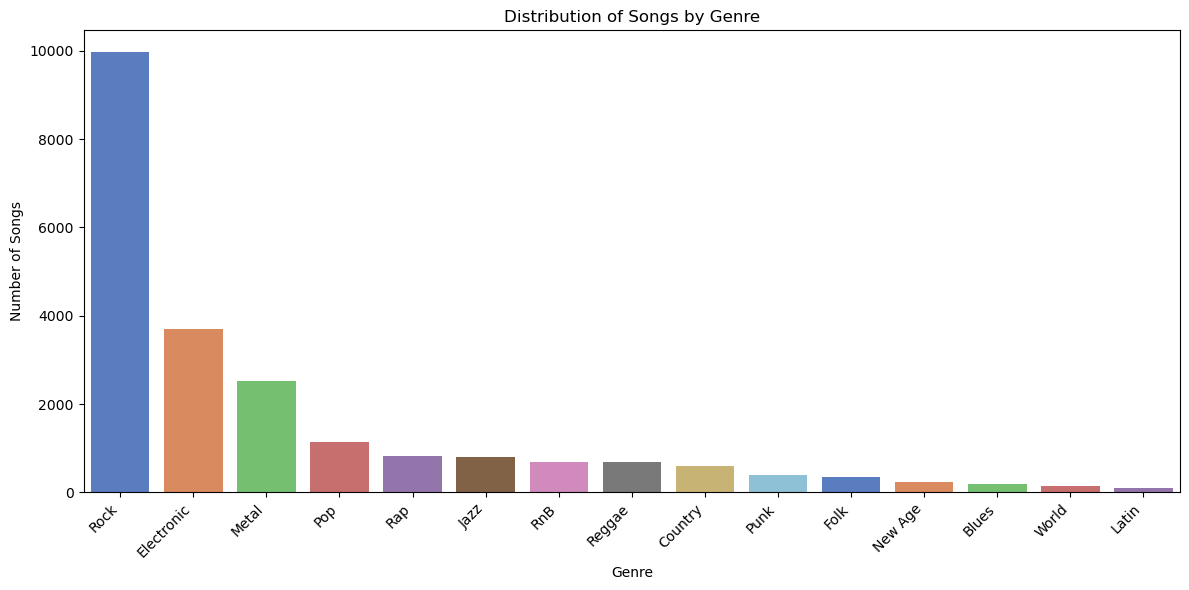

In [4]:
# Drop rows with any missing values in selected features or genre
df_clean = df[[
    'year', 'duration_ms', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo', 'time_signature', 'genre'
]].dropna()

# Separate features and target
X = df_clean.drop("genre", axis=1)
y = df_clean["genre"]

# Encode the target (genre)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train/test split BEFORE scaling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Now scale features using only training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Count genres in the cleaned dataset
genre_counts = df_clean['genre'].value_counts()

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='muted')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Songs by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Songs')
plt.tight_layout()
plt.show()

In [5]:
# this is the first training model- Logistic Regression. I was able to correctly and properly import and train the model
# on my own. As well as correcrlly making the predictions. I needed help with evaluating the performance of the model which is 
# where ChatGPT helped me for the classification report and confusion matrix. 

# There were some issues with the model conusing genres like pop, jazz, and countru with other genres. And this model was only giving me around 25% accuracy.

# OpenAI. (2024). ChatGPT (May 2024 version) [Large language model]. OpenAI. https://chatgpt.com/c/681bc2a5-1bf4-800a-b06e-f71faf37e82d

Classification Report:

              precision    recall  f1-score   support

       Blues       0.04      0.08      0.05        38
     Country       0.09      0.33      0.14       122
  Electronic       0.58      0.43      0.49       742
        Folk       0.11      0.35      0.16        71
        Jazz       0.12      0.02      0.03       159
       Latin       0.03      0.25      0.05        20
       Metal       0.41      0.61      0.49       503
     New Age       0.08      0.49      0.14        47
         Pop       0.09      0.11      0.10       229
        Punk       0.07      0.53      0.13        77
         Rap       0.34      0.48      0.39       164
      Reggae       0.11      0.23      0.15       138
         RnB       0.09      0.05      0.07       139
        Rock       0.69      0.10      0.17      1993
       World       0.03      0.21      0.06        28

    accuracy                           0.25      4470
   macro avg       0.19      0.28      0.18      4470
we

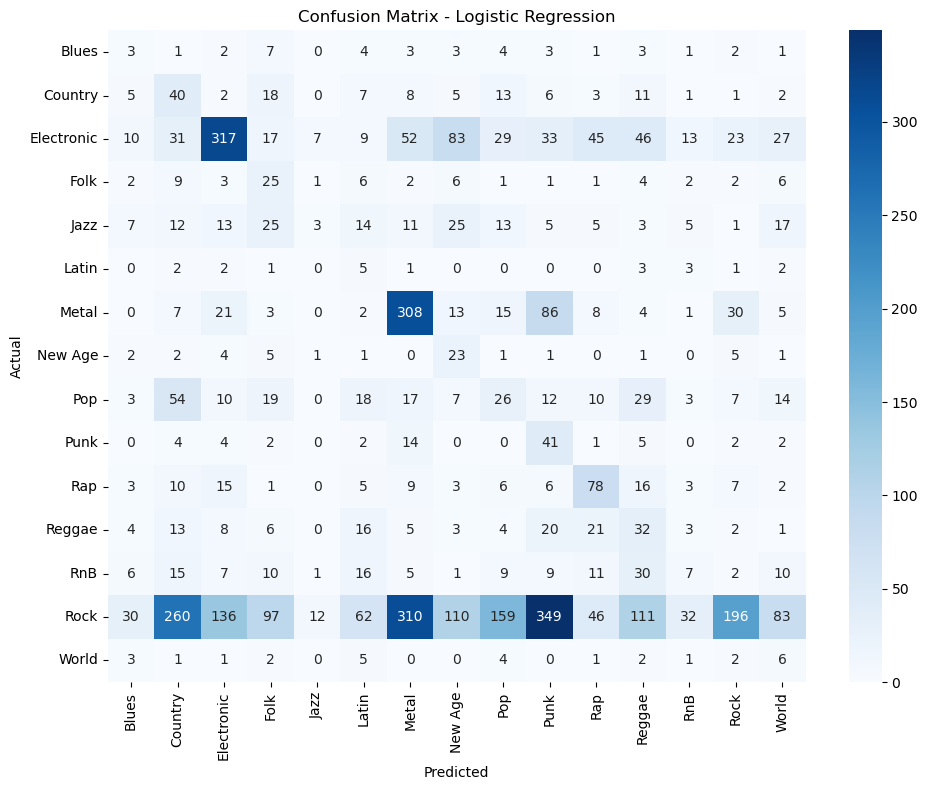

In [6]:
from sklearn.linear_model import LogisticRegression

# Create the model
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', class_weight = 'balanced')

# Train the model
log_reg.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test_scaled)

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [7]:
# Next the second training model- KNN
# I was able to implement KNN properly myself. I did ask ChatGPT for help with the confusion matrix and evaluation
# parts with plotting the data.

# This model had an overall accuracy of 46% which is better than the logistic regression accuracy.

# OpenAI. (2024). ChatGPT (May 2024 version) [Large language model]. OpenAI. https://chatgpt.com/c/681bc2a5-1bf4-800a-b06e-f71faf37e82d

Classification Report - KNN:

              precision    recall  f1-score   support

       Blues       0.06      0.05      0.05        38
     Country       0.09      0.08      0.08       122
  Electronic       0.48      0.54      0.51       742
        Folk       0.09      0.06      0.07        71
        Jazz       0.10      0.04      0.06       159
       Latin       0.00      0.00      0.00        20
       Metal       0.41      0.40      0.40       503
     New Age       0.23      0.11      0.14        47
         Pop       0.13      0.09      0.11       229
        Punk       0.20      0.04      0.07        77
         Rap       0.43      0.33      0.37       164
      Reggae       0.15      0.06      0.08       138
         RnB       0.14      0.05      0.07       139
        Rock       0.55      0.68      0.61      1993
       World       0.00      0.00      0.00        28

    accuracy                           0.46      4470
   macro avg       0.20      0.17      0.18      4

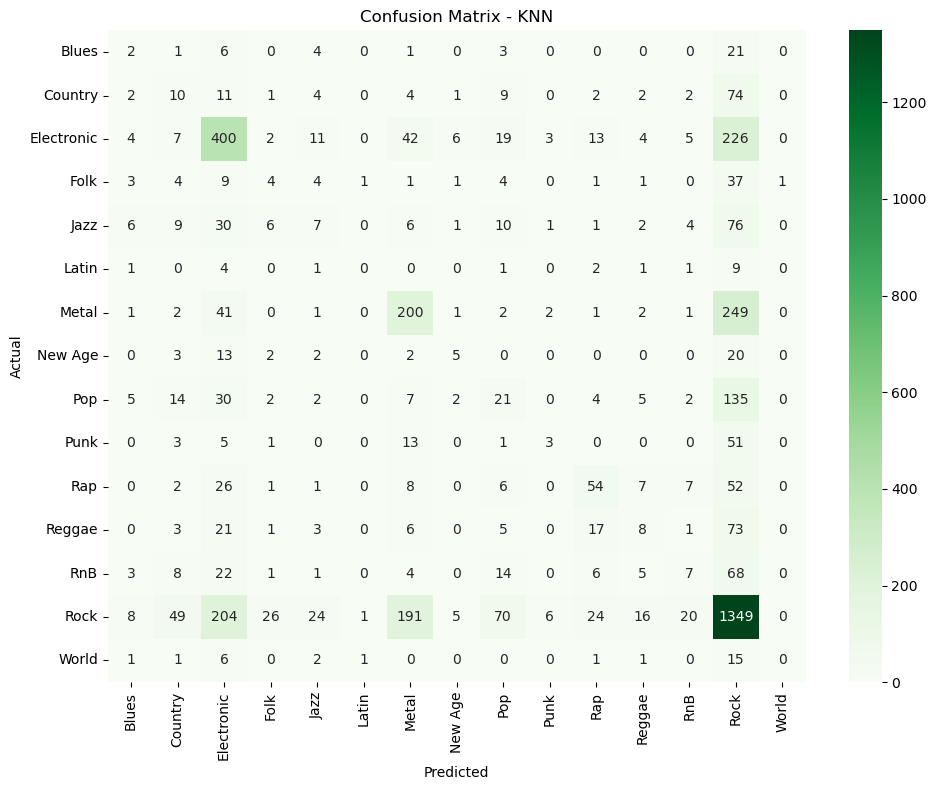

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create the model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_knn = knn.predict(X_test_scaled)

# Classification report
print("Classification Report - KNN:\n")
print(classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_))

# Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_knn, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#I would like to acknowledge the use of OpenAI's ChatGPT for guidance throughout this project. 
# ChatGPT helped me debug my code, structure my report, and better understand concepts such as logistic regression, K-nearest neighbors, and the curse of dimensionality. 
# For a more detailed explanation of how AI was implemented in this project, please click here: https://docs.google.com/document/d/1l6MxjSLgK82QyWoKpMJenibHCFZAyzXb6mk4FbEHRRQ/edit?usp=sharing.
# I also consulted articles from GeeksforGeeks to reinforce my theoretical understanding of the algorithms used. 
# All model implementation and evaluation were performed independently using JupyterLab and Python libraries including scikit-learn, pandas, and matplotlib. 
